In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mlp
import plotly.express as px
%config InlineBackend.figure_format = 'retina'
%matplotlib inline


In [3]:
df_1 = pd.read_csv("https://raw.githubusercontent.com/YousefAlotaibi/saudi_used_cars_price_prediciton/main/data/ScrapedData/cars_data.csv")
df_2 = pd.read_csv("https://raw.githubusercontent.com/YousefAlotaibi/saudi_used_cars_price_prediciton/main/data/ScrapedData/cars_data2.csv")
df_3 = pd.read_csv("https://raw.githubusercontent.com/YousefAlotaibi/saudi_used_cars_price_prediciton/main/data/ScrapedData/cars_data3.csv")
df = pd.concat([df_1,df_2,df_3])
df.head(4)

,car_name,model_year,km,transmission,fuel,color,no_doors,engine_capacity,drive_type,no_cylinders,Accident_history,price
0,Used BMW 7 Series 730Li 2018,2018,"34,770KM",Automatic,Petrol,Silver,4.0,1998.0,\n Rear Wheel Drive\n,4,Perfect inside out,"190,000"
1,Used Infiniti QX80 5.6L Luxe (8 Seats) 2020,2020,"38,928KM",Automatic,Petrol,White,5.0,5552.0,\n All Wheel Drive\n,8,Perfect inside out,"228,350"
2,Used Chevrolet Suburban 5.3L LS 2WD 2018,2018,"36,827KM",Automatic,Petrol,Black,5.0,5300.0,\n Rear Wheel Drive\n,8,Perfect inside out,"135,575"
3,Used Chevrolet Silverado 2016,2016,"142,731KM",Automatic,Petrol,White,2.0,5300.0,\n All Wheel Drive\n,8,Perfect inside out,"64,450"


In [4]:
df['car_name'].str.contains('New').sum()

98

In [5]:
df = df[df["car_name"].str.contains("New") == False]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8617 entries, 0 to 1059
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_name          8617 non-null   object 
 1   model_year        8617 non-null   int64  
 2   km                8617 non-null   object 
 3   transmission      4895 non-null   object 
 4   fuel              1091 non-null   object 
 5   color             7629 non-null   object 
 6   no_doors          1061 non-null   float64
 7   engine_capacity   958 non-null    float64
 8   drive_type        8617 non-null   object 
 9   no_cylinders      4926 non-null   object 
 10  Accident_history  4817 non-null   object 
 11  price             8617 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 875.2+ KB


In [7]:
df.duplicated().sum()

3547

In [8]:
# Remove the duplicaions
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [9]:
df.car_name

0                      Used BMW 7 Series  730Li 2018
1       Used Infiniti QX80  5.6L Luxe (8 Seats) 2020
2          Used Chevrolet Suburban  5.3L LS 2WD 2018
3                      Used Chevrolet Silverado 2016
4                Used GMC Yukon  5.3L SLE (2WD) 2018
                            ...                     
5854                              Used Fiat 500 2012
711                 Used Land Rover Range Rover 2019
1234             Used Toyota Land Cruiser Prado 2015
70                          Used Hyundai Accent 2019
1059    Used Toyota Corolla  1.6L XLI Executive 2006
Name: car_name, Length: 5070, dtype: object

In [10]:
# Split it into two new columns car_make and car_model
df['car_make'] = df['car_name'].str.split(' ').str[1]
df['car_model'] = df['car_name'].str.split(' ').str[2]
df.head(4)

,car_name,model_year,km,transmission,fuel,color,no_doors,engine_capacity,drive_type,no_cylinders,Accident_history,price,car_make,car_model
0,Used BMW 7 Series 730Li 2018,2018,"34,770KM",Automatic,Petrol,Silver,4.0,1998.0,\n Rear Wheel Drive\n,4,Perfect inside out,"190,000",BMW,7
1,Used Infiniti QX80 5.6L Luxe (8 Seats) 2020,2020,"38,928KM",Automatic,Petrol,White,5.0,5552.0,\n All Wheel Drive\n,8,Perfect inside out,"228,350",Infiniti,QX80
2,Used Chevrolet Suburban 5.3L LS 2WD 2018,2018,"36,827KM",Automatic,Petrol,Black,5.0,5300.0,\n Rear Wheel Drive\n,8,Perfect inside out,"135,575",Chevrolet,Suburban
3,Used Chevrolet Silverado 2016,2016,"142,731KM",Automatic,Petrol,White,2.0,5300.0,\n All Wheel Drive\n,8,Perfect inside out,"64,450",Chevrolet,Silverado


In [11]:
# Sorting the columns and removing the car_name column
df = df[['car_make', 'car_model', 'model_year', 'km', 'transmission', 'fuel', 'color', 'no_doors', 'engine_capacity', 'drive_type', 'no_cylinders', 'Accident_history', 'price']]
df.head(4)

,car_make,car_model,model_year,km,transmission,fuel,color,no_doors,engine_capacity,drive_type,no_cylinders,Accident_history,price
0,BMW,7,2018,"34,770KM",Automatic,Petrol,Silver,4.0,1998.0,\n Rear Wheel Drive\n,4,Perfect inside out,"190,000"
1,Infiniti,QX80,2020,"38,928KM",Automatic,Petrol,White,5.0,5552.0,\n All Wheel Drive\n,8,Perfect inside out,"228,350"
2,Chevrolet,Suburban,2018,"36,827KM",Automatic,Petrol,Black,5.0,5300.0,\n Rear Wheel Drive\n,8,Perfect inside out,"135,575"
3,Chevrolet,Silverado,2016,"142,731KM",Automatic,Petrol,White,2.0,5300.0,\n All Wheel Drive\n,8,Perfect inside out,"64,450"


In [12]:
df['car_make'].value_counts()

Toyota           1627
Hyundai           907
Ford              309
Kia               280
Chevrolet         249
Nissan            167
Mercedes-Benz     157
Lexus             148
BMW               141
Honda             112
GMC               111
Mazda              99
Dodge              96
Jeep               69
Audi               63
Mitsubishi         59
Land               46
Porsche            41
Renault            40
Infiniti           34
Cadillac           33
Chrysler           31
Volkswagen         30
Changan            29
MG                 26
Haval              22
Genesis            16
Jaguar             15
Geely              14
Isuzu              12
Suzuki             10
Lincoln             8
Fiat                7
GAC                 7
Peugeot             7
Daihatsu            6
Bentley             5
Mini                5
Maserati            5
RAM                 4
Jetour              3
Hummer              3
Subaru              2
Datsun              2
Mercury             2
Alfa      

In [13]:
# Fixing the car_make of Land Rover
df['car_make'] = df['car_make'].str.replace('Land', 'Land Rover')

In [14]:
# Removing car_make with value count less than 5
df = df.groupby('car_make').filter(lambda x : len(x)>4)
df.car_make.value_counts()

Toyota           1627
Hyundai           907
Ford              309
Kia               280
Chevrolet         249
Nissan            167
Mercedes-Benz     157
Lexus             148
BMW               141
Honda             112
GMC               111
Mazda              99
Dodge              96
Jeep               69
Audi               63
Mitsubishi         59
Land Rover         46
Porsche            41
Renault            40
Infiniti           34
Cadillac           33
Chrysler           31
Volkswagen         30
Changan            29
MG                 26
Haval              22
Genesis            16
Jaguar             15
Geely              14
Isuzu              12
Suzuki             10
Lincoln             8
GAC                 7
Fiat                7
Peugeot             7
Daihatsu            6
Mini                5
Maserati            5
Bentley             5
Name: car_make, dtype: int64

In [15]:
# Removing \n from drive type
df['drive_type'] = df['drive_type'].str.replace('\n', '')

In [16]:
# Converting km and price to int
df['km'] = df['km'].str.replace('KM', '')
df['km'] = df['km'].str.replace(',', '')
df['price'] = df['price'].str.replace(',', '')
df['price'] = df['price'].astype(int)
df['km'] = df['km'].astype(int)
df.head(4)

,car_make,car_model,model_year,km,transmission,fuel,color,no_doors,engine_capacity,drive_type,no_cylinders,Accident_history,price
0,BMW,7,2018,34770,Automatic,Petrol,Silver,4.0,1998.0,Rear Wheel Drive,4,Perfect inside out,190000
1,Infiniti,QX80,2020,38928,Automatic,Petrol,White,5.0,5552.0,All Wheel Drive,8,Perfect inside out,228350
2,Chevrolet,Suburban,2018,36827,Automatic,Petrol,Black,5.0,5300.0,Rear Wheel Drive,8,Perfect inside out,135575
3,Chevrolet,Silverado,2016,142731,Automatic,Petrol,White,2.0,5300.0,All Wheel Drive,8,Perfect inside out,64450


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5043 entries, 0 to 1059
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_make          5043 non-null   object 
 1   car_model         5043 non-null   object 
 2   model_year        5043 non-null   int64  
 3   km                5043 non-null   int64  
 4   transmission      3188 non-null   object 
 5   fuel              648 non-null    object 
 6   color             4115 non-null   object 
 7   no_doors          632 non-null    float64
 8   engine_capacity   575 non-null    float64
 9   drive_type        5043 non-null   object 
 10  no_cylinders      3205 non-null   object 
 11  Accident_history  2505 non-null   object 
 12  price             5043 non-null   int64  
dtypes: float64(2), int64(3), object(8)
memory usage: 551.6+ KB


In [132]:
df.no_cylinders.value_counts()

4                1471
6                1058
8                 617
Not Sure           34
3                  15
5                  12
12                  5
N/A, Electric       2
10                  1
Other               1
Name: no_cylinders, dtype: int64

In [18]:
# Renaming Not Sure, Other, N/A, Electric and NaN in no_cylinders to Unknown
df['no_cylinders'] = df['no_cylinders'].str.replace('Not Sure','Unknown', regex=True)
df['no_cylinders'] = df['no_cylinders'].str.replace('N/A, Electric','Unknown', regex=True)
df['no_cylinders'] = df['no_cylinders'].str.replace('Other','Unknown', regex=True)
df['no_cylinders'].fillna('Unknown', inplace=True)

NA Values

In [19]:
df.isna().sum()

car_make               0
car_model              0
model_year             0
km                     0
transmission        1855
fuel                4395
color                928
no_doors            4411
engine_capacity     4468
drive_type             0
no_cylinders           0
Accident_history    2538
price                  0
dtype: int64

In [23]:
# Dropping the variables no_doors, engine_capacity and fuel
df.drop(['no_doors', 'engine_capacity', 'fuel'], axis=1, inplace=True)

In [27]:
# Filling the missing values for color and transmission with unknown
df['color'].fillna('Unknown', inplace=True)
df['color'] = df['color'].str.replace('Other','Unknown', regex=True)
df['color'] = df['color'].str.replace('Gray','Grey', regex=True)
df['transmission'].fillna('Unknown', inplace=True)

In [21]:
# Filling the missing values for Accident_history with no history
df['Accident_history'].fillna('no history', inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5043 entries, 0 to 1059
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   car_make          5043 non-null   object
 1   car_model         5043 non-null   object
 2   model_year        5043 non-null   int64 
 3   km                5043 non-null   int64 
 4   transmission      5043 non-null   object
 5   color             5043 non-null   object
 6   drive_type        5043 non-null   object
 7   no_cylinders      5043 non-null   object
 8   Accident_history  5043 non-null   object
 9   price             5043 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 433.4+ KB


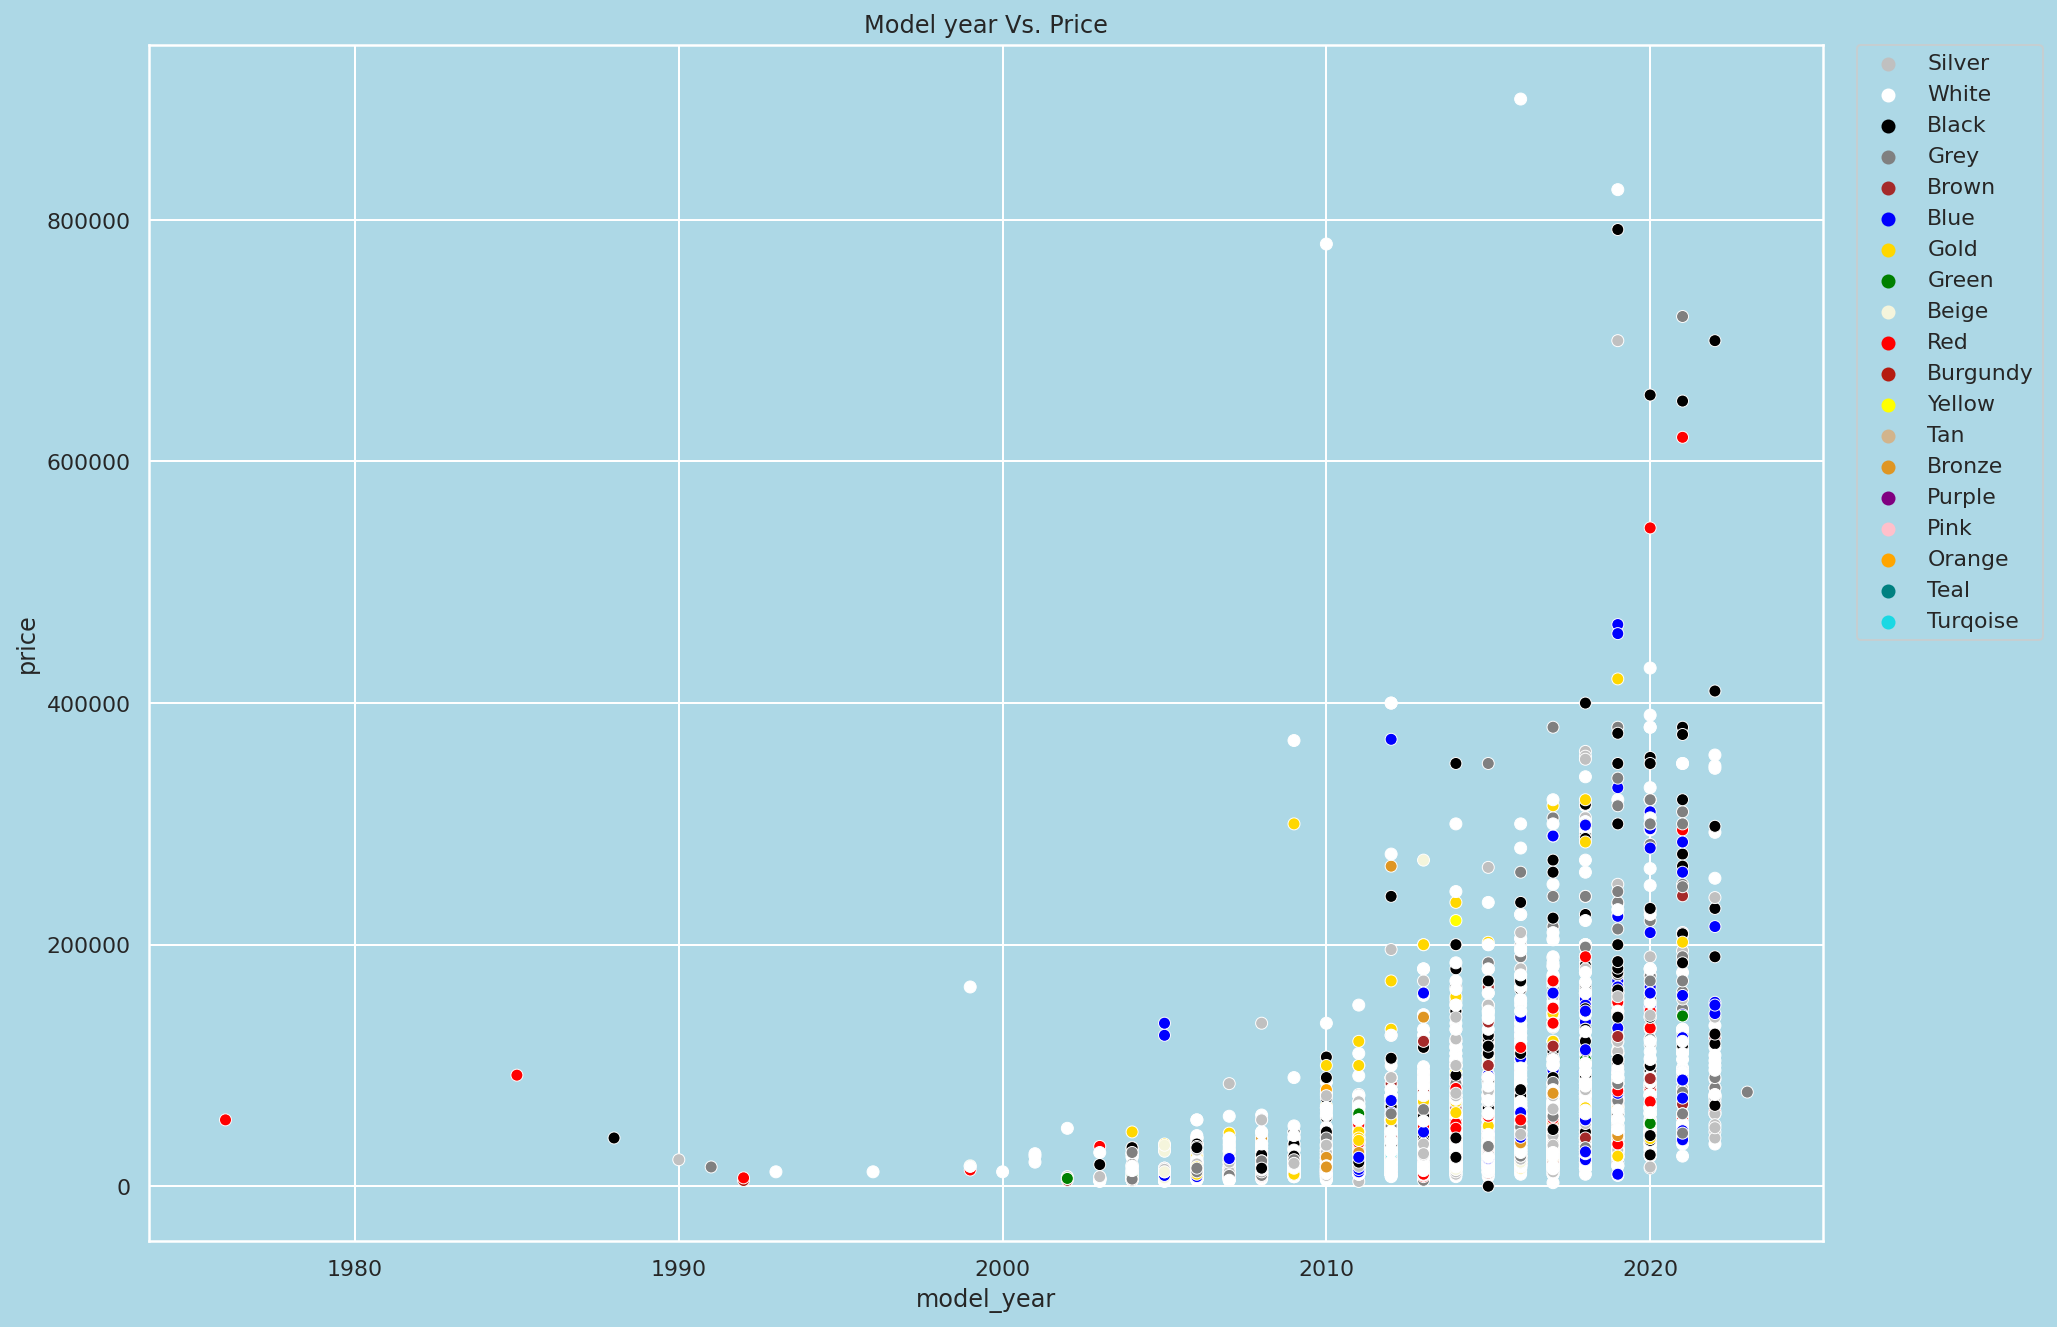

In [28]:
df_new = df.drop(df[df['color'] == 'Unknown'].index)

color_dict = dict(Silver = 'silver',
                  White = 'white',
                  Black = 'black',
                  Brown = 'brown',
                  Blue = 'blue',
                  Gold = 'gold',
                  Green = 'green',
                  Beige = 'beige',
                  Red = 'red',
                  Grey = 'grey',
                  Burgundy = '#b51b10',
                 Yellow = 'yellow',
                  Tan = 'tan',
                  Bronze = '#df9623',
                  Purple = 'purple',
                  Orange = 'orange',    
                  Teal = 'teal',
                  Turqoise = '#1ad8e3',
                  Pink = 'pink'
                  )
#set the figure size
plt.figure(figsize=(15,11))

#change the background of the figure
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})

# Provide a dictionary to the palette argument
sns.scatterplot( x="model_year", y="price", data=df_new, hue='color', palette=color_dict)


# Move the legend to an empty part of the plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

#set the title
plt.title('Model year Vs. Price')
 
plt.show()
